In [1]:
import numpy as np
import gym
from gym import wrappers
import time
import matplotlib.pyplot as plt
from matplotlib import pyplot as ply

In [2]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Runs an episode and return the total reward """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [3]:
def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    #print (scores)
    return np.mean(scores)

In [4]:
def extract_policy(env, v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

In [34]:
def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    valueDiff = []
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        vD = np.sum(np.fabs(prev_v - v))
        valueDiff.append(vD)
        if (vD <= eps):
            # value converged
            break
    return v, valueDiff

In [35]:
def policy_iteration(env, gamma = 1.0):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    max_iterations = 200000
    gamma = 1.0
    vDiff = []
    for i in range(max_iterations):
        old_policy_v,vD = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(env, old_policy_v, gamma)
        #print (vD)
        #vDiff.append(vD)
        if (np.all(policy == new_policy)):
            k=i+1
            #print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy,k,vD

In [23]:
# if __name__ == '__main__':
#     env_name  = 'FrozenLake-v0'
#     env = gym.make(env_name)
#     optimal_policy = policy_iteration(env, gamma = 1.0)
#     scores = evaluate_policy(env, optimal_policy, gamma = 1.0)
#     print('Average scores = ', np.mean(scores))

POLICY ITERATION WITH FROZEN LAKE


(0.0, 0.25)

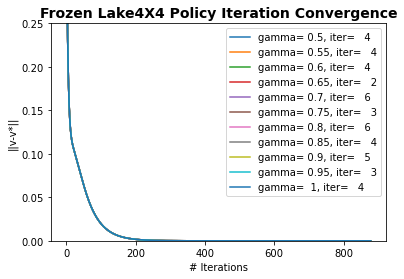

In [36]:
environment  = 'FrozenLake-v0'
env = gym.make(environment)
env = env.unwrapped
desc = env.unwrapped.desc

env.seed(0)
np.random.seed(0)

time_array=[] #[0]*10
gamma_arr=[] #[0]*10
iters=[] #[0]*10
list_scores=[] #[0]*10


### POLICY ITERATION ####
print('POLICY ITERATION WITH FROZEN LAKE')
for g in np.linspace(0.5, 1, 11):
    st=time.time()
    best_policy,k,valueDiff = policy_iteration(env, gamma = g)
    scores = evaluate_policy(env, best_policy, gamma = g)
    end=time.time()
    gamma_arr.append(g)
    list_scores.append(np.mean(scores))
    iters.append(k)
    time_array.append(end-st)
    #print (valueDiff)
    ply.plot(valueDiff,label= 'gamma= %2.2g, iter= %3d' %(g,k))
    
ply.title('Frozen Lake4X4 Policy Iteration Convergence',fontsize=14, fontweight='bold')
ply.ylabel('||v-v*||')
ply.xlabel('# Iterations')
ply.legend(loc = 'upper right')
ply.ylim([0,.25])

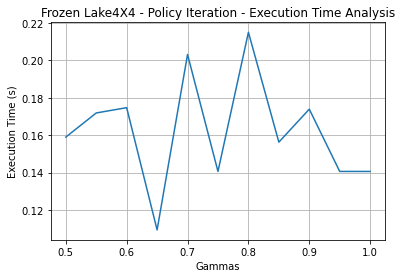

In [37]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Frozen Lake4X4 - Policy Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()
#plt.savefig('Frozen Lake - Policy Iteration - Execution Time Analysis')

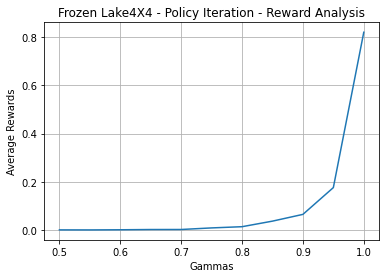

In [38]:
plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake4X4 - Policy Iteration - Reward Analysis')
plt.grid()
plt.show()
#plt.savefig('Frozen Lake - Policy Iteration - Reward Analysis')

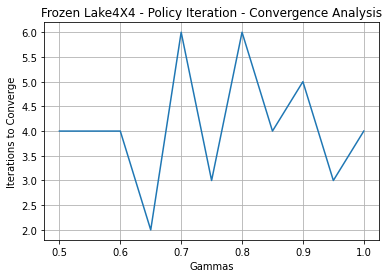

In [39]:
plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake4X4 - Policy Iteration - Convergence Analysis')
plt.grid()
plt.show()
#plt.savefig('Frozen Lake - Policy Iteration - Convergence Analysis')

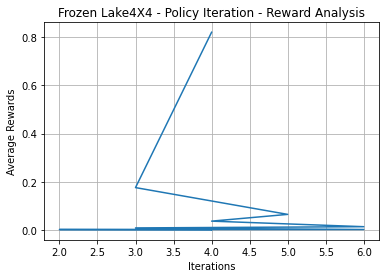

In [40]:
plt.plot(iters,list_scores)
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake4X4 - Policy Iteration - Reward Analysis')
plt.grid()
plt.show()
#plt.savefig('Frozen Lake - Policy Iteration - Reward Analysis')

POLICY ITERATION WITH FROZEN LAKE


(0.0, 0.25)

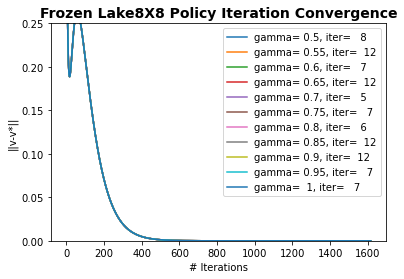

In [41]:
environment8  = 'FrozenLake8x8-v0'
env8 = gym.make(environment8)
env8 = env8.unwrapped
desc = env8.unwrapped.desc

env8.seed(0)
np.random.seed(0)

time_array=[] #[0]*10
gamma_arr=[] #[0]*10
iters=[] #[0]*10
list_scores=[] #[0]*10


### POLICY ITERATION ####
print('POLICY ITERATION WITH FROZEN LAKE')
for g in np.linspace(0.5, 1, 11):
    st=time.time()
    best_policy,k,valueDiff = policy_iteration(env8, gamma = g)
    scores = evaluate_policy(env8, best_policy, gamma = g)
    end=time.time()
    gamma_arr.append(g)
    list_scores.append(np.mean(scores))
    iters.append(k)
    time_array.append(end-st)
    ply.plot(valueDiff,label= 'gamma= %2.2g, iter= %3d' %(g,k))
    
ply.title('Frozen Lake8X8 Policy Iteration Convergence',fontsize=14, fontweight='bold')
ply.ylabel('||v-v*||')
ply.xlabel('# Iterations')
ply.legend(loc = 'upper right')
ply.ylim([0,.25])

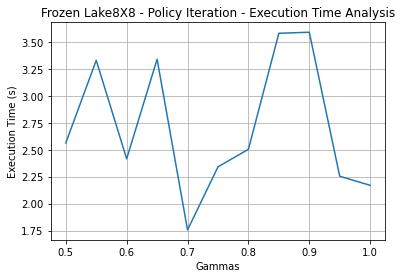

In [42]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Frozen Lake8X8 - Policy Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

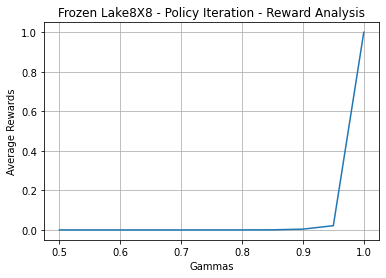

In [43]:
plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake8X8 - Policy Iteration - Reward Analysis')
plt.grid()
plt.show()

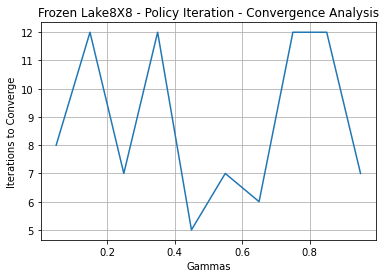

In [16]:
plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake8X8 - Policy Iteration - Convergence Analysis')
plt.grid()
plt.show()

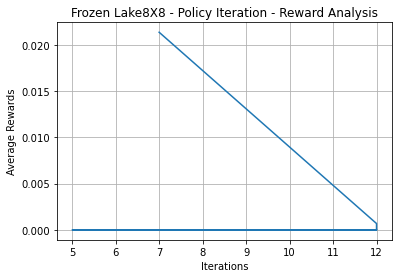

In [17]:
plt.plot(iters,list_scores)
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake8X8 - Policy Iteration - Reward Analysis')
plt.grid()
plt.show()